In [4]:
%matplotlib notebook

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import hvplot.pandas
import requests
import time
from scipy import stats
from scipy.stats import linregress

In [6]:
# CSV Source - Readin File - https://ourworldindata.org/life-expectancy
df_number_of_deaths = pd.read_csv("number-of-deaths-per-year.csv")
df_number_of_deaths

,Entity,Code,Year,Deaths - Sex: all - Age: all - Variant: estimates,Deaths - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,283668.0,NaN
1,Afghanistan,AFG,1951,282577.0,NaN
2,Afghanistan,AFG,1952,280803.0,NaN
3,Afghanistan,AFG,1953,279684.0,NaN
4,Afghanistan,AFG,1954,280476.0,NaN
...,...,...,...,...,...
38500,Zimbabwe,ZWE,2096,NaN,416424.0
38501,Zimbabwe,ZWE,2097,NaN,419237.0
38502,Zimbabwe,ZWE,2098,NaN,421863.0
38503,Zimbabwe,ZWE,2099,NaN,424443.0


In [7]:
#Rename Columns
df_number_of_deaths = df_number_of_deaths.rename(
    columns = {
    "Entity" : "Country name",
    "Deaths - Sex: all - Age: all - Variant: estimates" : "Death's Per Year"
}
)
df_number_of_deaths

,Country name,Code,Year,Death's Per Year,Deaths - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,283668.0,NaN
1,Afghanistan,AFG,1951,282577.0,NaN
2,Afghanistan,AFG,1952,280803.0,NaN
3,Afghanistan,AFG,1953,279684.0,NaN
4,Afghanistan,AFG,1954,280476.0,NaN
...,...,...,...,...,...
38500,Zimbabwe,ZWE,2096,NaN,416424.0
38501,Zimbabwe,ZWE,2097,NaN,419237.0
38502,Zimbabwe,ZWE,2098,NaN,421863.0
38503,Zimbabwe,ZWE,2099,NaN,424443.0


In [8]:
#Set Countries needed and years needed
countries = ["United States", "United Kingdom", "China", "India", "South Africa", "Australia", "Brazil", "Japan", "Russia", "Israel", "Germany"]
df = df_number_of_deaths.loc[(df_number_of_deaths["Country name"].isin(countries)) &
                    (df_number_of_deaths["Year"] > 2009) &
                    (df_number_of_deaths["Year"] < 2019)]
df

,Country name,Code,Year,Death's Per Year,Deaths - Sex: all - Age: all - Variant: medium
2023,Australia,AUS,2010,142544.0,NaN
2024,Australia,AUS,2011,146380.0,NaN
2025,Australia,AUS,2012,148916.0,NaN
2026,Australia,AUS,2013,148216.0,NaN
2027,Australia,AUS,2014,153941.0,NaN
...,...,...,...,...,...
36304,United States,USA,2014,2625365.0,NaN
36305,United States,USA,2015,2699590.0,NaN
36306,United States,USA,2016,2720154.0,NaN
36307,United States,USA,2017,2772099.0,NaN


<IPython.core.display.Javascript object>


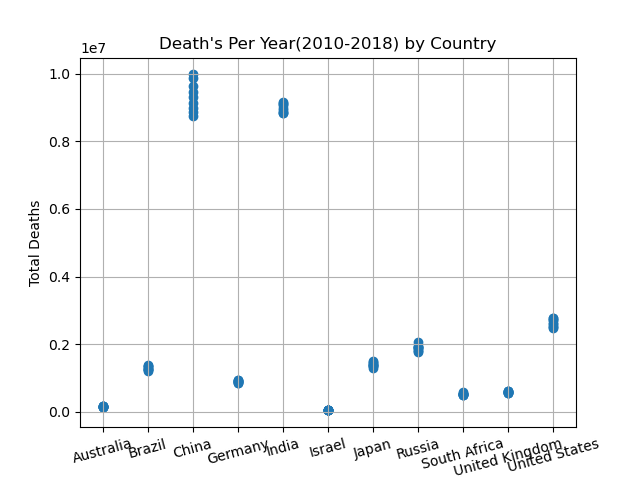

In [10]:
#Create Scatter Plot
plt.scatter(df["Country name"], df["Death's Per Year"])

#Set Title and Labels 
plt.title("Death's Per Year(2010-2018) by Country")
plt.ylabel("Total Deaths")
plt.xlabel("Country")
plt.xticks(rotation=15)
plt.grid(True)

#Save Scatter Plot Locally
plt.savefig("Project Images/DeathsPerCountry.png")

In [11]:
df.mean()

C:\Users\jlowr\AppData\Local\Temp\ipykernel_21408\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Year                                              2.014000e+03
Death's Per Year                                  2.521730e+06
Deaths - Sex: all - Age: all - Variant: medium             NaN
dtype: float64

In [18]:
df["Death's Per Year"].mean()

2521730.4343434344

In [20]:
df["Death's Per Year"].describe()

count    9.900000e+01
mean     2.521730e+06
std      3.232817e+06
min      3.919900e+04
25%      5.408690e+05
50%      1.276208e+06
75%      2.532610e+06
max      9.981184e+06
Name: Death's Per Year, dtype: float64